# Feedforward Neural Networks (pt. 2) #
<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png" />

In the previous section, we built a softmax classifier with the objective function: $$J = minimize\{-log(\hat{y}_{correct})\}$$

Where $\hat{y}_{correct} \in \hat{y}$ and $\hat{y} = softmax(x~W)$

So far, the forward pipeline is as follows:

1. Multiply your input $x$ by the matrix $W$ to obtain the scores (call them $s$) for each class.
2. Compute $softmax(s)$ to obtain $\hat{y}$ (the "probabilities" for each class).
3. Compute the cross entropy objective (commonly known as the "cross entropy loss")

The backward pipeline, applied to train the classifier using gradient descent, is as follows:

1. Compute the gradient of the objective function w.r.t. the "trainable" parameters stored in $W$.
2. Update the parameters using the gradients computed.

We can easily transform this into a Neural Network by adding a "hidden layer" between the input $x$ and the step where we compute the scores. Everything else would remain the same.

The forward pipeline would now look as follows:

1. Multiply your input $x$ by the matrix $W^{(h)} \in \mathbf{R^{DxH}}$ (where $(h)$ is only an identifier for the matrix, and $\mathbf{H}$ is the number of columns) to obtain the hidden state $h \in \mathbf{R^{1xH}}$.
1. Multiply your hidden state $h$ by the output matrix $W^{(o)} \in \mathbf{R^{HxC}}$ (where $(o)$ is only an identifier for the matrix) to obtain the scores $s$ for each class.
2. Compute $softmax(s)$ to obtain $\hat{y}$ (the "probabilities" for each class).
3. Compute the cross entropy objective (commonly known as the "cross entropy loss")

So the objective looks exacty the same, but $\hat{y}$ now is:
$\hat{y} = softmax(x~W^{(h)}~W^{(o)})$

The backward pipeline, applied to train the classifier using gradient descent, is as follows:

1. Compute the gradient of the objective function w.r.t. the "trainable" parameters in $W^{(h)}$ and $W^{(o)}$.
2. Update the parameters using the gradients computed.

As you can see, now we will have to compute two gradients:

$\frac{\partial J}{\partial W^{(h)}}$

$\frac{\partial J}{\partial W^{(o)}}$

These gradients would be similar to the ones we calculated previously (note that the scores $s$ now are $s=~x ~W^{(h)} ~W^{(o)}$):

$\frac{\partial J }{\partial W^{(h)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(h)}}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W^{(h)} ~W^{(o)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(h)}}\big)^T~\frac{\partial J}{\partial s} = \big(x^T~\frac{\partial J}{\partial s}\big) ~\big(W^{(o)}\big)^T$

$\frac{\partial J }{\partial W^{(o)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(o)}}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W^{(h)} ~W^{(o)}} = ~\big(\frac{\partial ~x ~W^{(h)} ~W^{(o)}}{\partial W^{(o)}}\big)^T ~\frac{\partial J}{\partial s} = \bigg(~\big(W^{(h)}\big)^T~x^T\bigg)~\frac{\partial J}{\partial s}$

And an update step in the direction that maximizes the value of the objective function would be:

$W^{(o)} := ~W^{(o)} + ~\alpha~\frac{\partial J }{\partial W^{(o)}}$

$W^{(h)} := ~W^{(h)} + ~\alpha~\frac{\partial J }{\partial W^{(h)}}$

Where $\alpha$ is a tunable free parameter better known as the "learning rate"

Modify your previous program so that this time we have a Neural Network with a hidden layer (you'll first have to reuse code that generates "fake" data)

Experiment with changing the $\alpha$ parameter. What else could you experiment with? (i.e. what are your "tunable" hyperparameters?)

In [5]:
l1(a,b) = sum(abs(a-b));

norm(x) = x/sum(x);
function norm_min(x)
    out = x-minimum(x);
    out = norm(out);
    return out;
end

softmax_sum(x) = sum(exp(x))
softmax(x) = exp(x)/sum(exp(x))

sigmoid(x) = 1/(1+exp(-x))
function sigmoids(x)
    n = size(x)[1]
    out = zeros(n)
    for i=1:n
        out[i] = sigmoid(x[i])
    end
    return out
end

function tanhs(x)
    n = size(x)[1]
    out = zeros(n)
    for i=1:n
        out[i] = tanh(x[i])
    end
    return out
end

function b_e(i,n)
    out = zeros(n);
    out[i] = 1;
    return out;
end;

In [6]:
N = 20;
D = 5;
C = 3;

srand(0);

data = rand(N, D);
labels = floor(Int,rand(1:C, N));
# labels[1:floor(Int,5*N/6)] = ones(1:floor(Int,5*N/6))
data = [data labels];
print(size(data))

(20,6)

In [33]:
N = 1000;
D = 5;
C = 2;

srand(0);

class_0 = 0.75*rand(floor(Int,N/C), D);
labels_0 = zeros(floor(Int,N/C), 1);
all_data = [class_0; 0.75*rand(floor(Int,N/C), D)+0.25];
all_labels = [labels_0+1; ones(floor(Int,N/C), 1)+1];
# all_data = [0.75*rand(floor(Int,N/C), D); 0.75*rand(floor(Int,N/C), D)+0.25]
# all_labels = [zeros(floor(Int,N/C), D); ones(floor(Int,N/C), 1)]
data = [all_data all_labels];

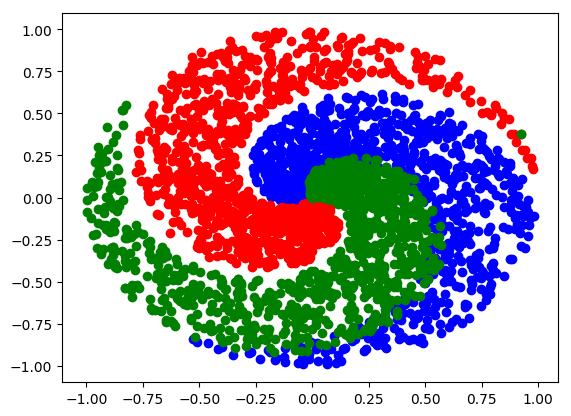

3000×3 Array{Float64,2}:
 -0.0           0.0          1.0
 -0.000886115   0.000465622  1.0
 -0.00121382    0.00159206   1.0
 -0.00271967    0.00127335   1.0
 -0.00136994    0.00376235   1.0
 -0.00476972    0.00151653   1.0
 -0.0038629     0.00459892   1.0
 -0.00678051   -0.00176717   1.0
 -0.00760811   -0.00249897   1.0
 -0.00628102    0.00645841   1.0
 -0.00986603   -0.00169169   1.0
 -0.0101379     0.00429705   1.0
 -0.0120079     0.000312606  1.0
  ⋮                             
 -0.981312     -0.122986     3.0
 -0.840594      0.522954     3.0
 -0.824236      0.55018      3.0
 -0.795959     -0.592028     3.0
 -0.933972     -0.33724      3.0
 -0.948347      0.297761     3.0
 -0.970256     -0.220497     3.0
 -0.995861     -0.0164006    3.0
 -0.995411      0.0562118    3.0
 -0.95185      -0.299969     3.0
 -0.995505     -0.0834807    3.0
 -0.908038      0.418888     3.0

In [125]:
N = 1000;
D = 2;
C = 3;

X = zeros(N*C,D)
y = zeros(N*C)
for j=1:C
  ix = (N*(j-1)+1):(N*(j))
    r = linspace(0,1,N) # radius
  t = linspace((j*4),((j+1)*4),N) + rand(N)*2
    X[ix,:] = [reshape(r.*sin(t),size(r.*sin(t))[1],1) reshape(r.*cos(t),size(r.*cos(t))[1],1)]
  y[ix] = j
end

using PyPlot

scatter(X[1:sum(y.==1),1],X[1:sum(y.==1),2],color="blue")
scatter(X[sum(y.==1)+1:sum(y.==1)+1+sum(y.==2),1],X[sum(y.==1)+1:sum(y.==1)+1+sum(y.==2),2],color="red")
scatter(X[end-sum(y.==3):end,1],X[end-sum(y.==3):end,2],color="green")

N = N*3;
data = [X y]

In [7]:
data = data[shuffle(1:N),:];
p_tr = 0.8; p_vl = 0.1; p_ts = 0.1;
i_tr = floor(Int, N*p_tr); i_vl = floor(Int, i_tr + N*p_vl); i_ts = N;
x_tr = data[1:i_tr,1:end-1]; x_vl = data[i_tr:i_vl,1:end-1]; x_ts = data[i_vl:i_ts,1:end-1];
y_tr = floor(Int,reshape(data[1:i_tr,end],size(x_tr)[1],1)); y_vl = reshape(data[i_tr:i_vl,end],size(x_vl)[1],1); y_ts = reshape(data[i_vl:i_ts,end],size(x_ts)[1],1);

Any[,,]
(3,)
1, (2,5)
2

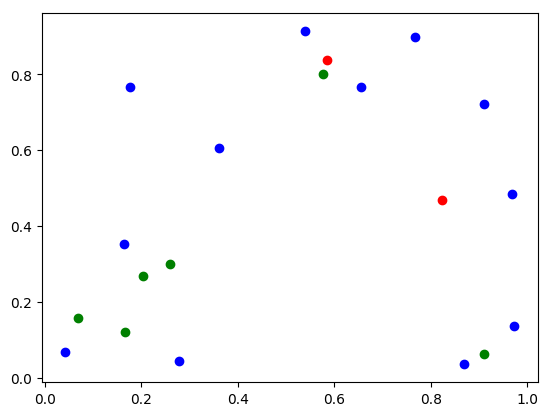

, (12,5)
3, (6,5)


In [8]:
using PyPlot
classes = []
for i=1:C
    append!(classes,[Array{Float64}(0,size(data)[2]-1)])
end
println(classes)
for i=1:size(data)[1]
    classes[floor(Int,data[i,end])] = [classes[floor(Int,data[i,end])]; reshape(data[i,1:end-1],1,D)]
#     append!(classes[floor(Int,data[i,end])], data[i,1:end-1]')
end
println(size(classes))
colors = ["red", "blue", "green", "yellow"]
for i=1:C
    print(i)
    print(", ")
    println(size(classes[i]))
    scatter(classes[i][:,1],classes[i][:,2],color=colors[i])
end
show();

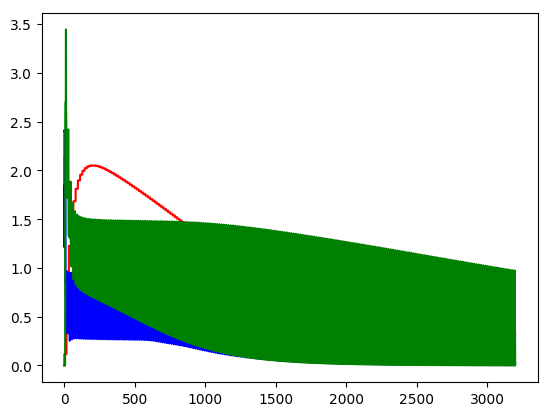

In [14]:
H = 10;

W_h = rand(D,H);
W_o = rand(H,C);
alpha = 0.01
iters = 200
J = zeros(size(x_tr)[1]*iters,C);
for n in 0:iters-1
#     new_order = shuffle(1:size(x_tr)[1])
#     x_tr = x_tr[new_order,:]
#     y_tr = y_tr[new_order,:]
    for i=1:size(x_tr)[1]
        h = *(x_tr[i,:]', W_h);
        o = *(h, W_o)
        y = softmax(o);
        y_correct = y[y_tr[i]];
        if size(x_tr)[1]*n+i > 1
            J[size(x_tr)[1]*n+i,:] = J[size(x_tr)[1]*n+i-1,:];
        end
        J[size(x_tr)[1]*n+i,y_tr[i]] = -log(y_correct);
        dJ_dS = y - b_e(y_tr[i],C)';
#         print("X ")
#         println(size(x_tr[i,:]''))
#         println(size(dJ_dS))
#         println(size(W_h))
#         println(size(W_o'))
        dJ_dW_h = *(*(x_tr[i,:]'',dJ_dS),W_o');
        dJ_dW_o = *(*(W_h',x_tr[i,:]),dJ_dS);

        W_h -= alpha*dJ_dW_h;
        W_o -= alpha*dJ_dW_o;
    end
end

using PyPlot
for i=1:C
    plot(J[:,i],color=colors[i])
end
# axis([0,size(J)[1],0,1]);
show();

What did you notice? What effect did tuning of hyperparameters have?

What makes this a good/bad/better/worse way to make a Neural Network Learn? How can we make it better?

Highlight observation with a group of classmates and be prepared to share with the class. 

The next logical step would be to add a non-linear function $f()$ right before reaching the hidden layer. This is in fact very common practice. The model would then compute $\hat{y}$ like this:

$$\hat{y} = softmax( ~f(x~W^{(h)})~W^{(o)})$$

There is a whole collection of different non-linearities that you can use. In fact, people have gotten graduate degrees carrying research aimed at finding the best non-linearities that solve different problems.

In practice, common non-linearities are:

* $\sigma(\theta)$ (the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function))
* $\tanh(\theta)$ (the [hyperbolic tangent](http://reference.wolfram.com/language/ref/Tanh.html.en))
* $\text{ReLU}(\theta) = f(\theta)=\max(0,\theta)$ (the Rectified Linear Unit)

For the purposes of this notebook we will focus on the first two, but feel free to experiment with any non-linearities you would like to. 

You can imagine that other side of the coin when adding a non-linearity to a Neural Network is knowing its derivative. 

Thankfully, the derivatives for $\sigma(\theta)$ and $\tanh(\theta)$ w.r.t $\theta$ are relatively simple:

$$\frac{\partial \sigma(\theta)}{\partial \theta} = \sigma(\theta)(1-\sigma(\theta)) $$

$$\frac{\partial \tanh(\theta)}{\partial \theta} = 1-\tanh^2(\theta)$$

As a case study, let's assume that we pick the sigmoid $\sigma(\theta)$ non-linearity to obtain the following expression:

$$\hat{y} = softmax( ~\sigma(x~W^{(h)})~W^{(o)})$$

The derivative of the cost function w.r.t parameters $W^{(h)}$ and $W^{(o)}$ would be:

$\frac{\partial J }{\partial W^{(o)}} = ~\big(\frac{\partial \sigma(~x~W^{(h)})~W^{(o)}}{\partial W^{(o)}}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W^{(h)} ~W^{(o)}} = ~\sigma(~x~W^{(h)})^T~\frac{\partial J}{\partial s}$



$\frac{\partial J }{\partial W^{(h)}} = ~\big(\frac{\partial \sigma(~x~W^{(h)})~W^{(o)}}{\partial W^{(h)}}\big)^T~\frac{\partial J}{\partial \hat{y}} ~\frac{\partial \hat{y}}{\partial ~x ~W^{(h)} ~W^{(o)}} = ~\big(\frac{\partial \sigma(~x~W^{(h)})~W^{(o)}}{\partial W^{(h)}}\big)^T~\frac{\partial J}{\partial s} =
x^T\bigg(\big( \sigma(~x~W^{(h)})(1-\sigma(~x~W^{(h)})) \big) \circ \big(~\frac{\partial J}{\partial s} ~(W^{(o)})^T\big)\bigg)$

where $\circ$ indicates the element-wise multiplication of two arrays.

Modify your previous program so that this time we have a Neural Network with a hidden layer and non-linear sigmoid gating.

Julia doesn't have a sigmoid function, so you'll have to write your own.

Experiment tuning your hyperparameters. Also, have you tried changing the initialization of the $W^{(h)}$ and the $W^{(o)}$ matrices? Would that matter at all?

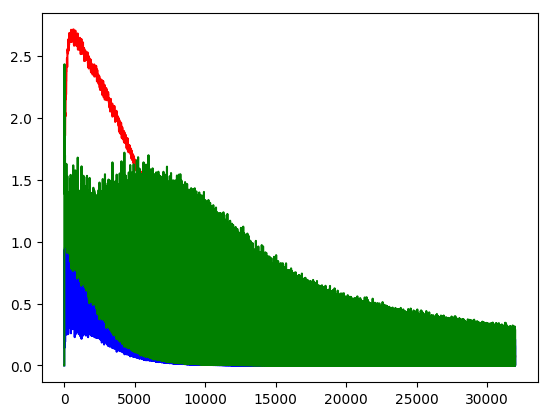

In [18]:
H = 10;
W_h = rand(D,H);
W_o = rand(H,C);
alpha = 0.01
iters = 2000
J = zeros(size(x_tr)[1]*iters,C);
for n in 0:iters-1
    new_order = shuffle(1:size(x_tr)[1])
    x_tr = x_tr[new_order,:]
    y_tr = y_tr[new_order,:]
    for i=1:size(x_tr)[1]
        h = *(x_tr[i,:]', W_h);
        z = sigmoids(h');
        o = *(h, W_o);
        y = softmax(o);
        y_correct = y[y_tr[i]];
        if size(x_tr)[1]*n+i > 1
            J[size(x_tr)[1]*n+i,:] = J[size(x_tr)[1]*n+i-1,:];
        end
        J[size(x_tr)[1]*n+i,y_tr[i]] = -log(y_correct);
        dJ_dS = y - b_e(y_tr[i],C)';
        dJ_dW_o = *(z,dJ_dS);
        dJ_dW_h = *(x_tr[i,:]'',(z.*(1-z))'.*(*(dJ_dS,W_o')));
        W_h -= alpha*dJ_dW_h;
        W_o -= alpha*dJ_dW_o;
    end
end

using PyPlot
for i=1:C
    plot(J[:,i],color=colors[i])
end
# axis([0,size(J)[1],0,1]);
show();

That's it! You have built a Neural Network from scratch.

Feel free to experiment with other non-linearities, adding more hidden layers (even with different non-linearities), and tuning your hyperparameters.

Congratulations!